## 주성분 분석(PCA, principal component analysis)
- 대표적인 차원(특성) 축소 알고리즘
- 최대한 특성을 살리면서 차원을 낮추는 방법

In [66]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # n_components= : 주성분의 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [68]:
pca.components_.shape

(50, 10000)

In [69]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # 그림그리기
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

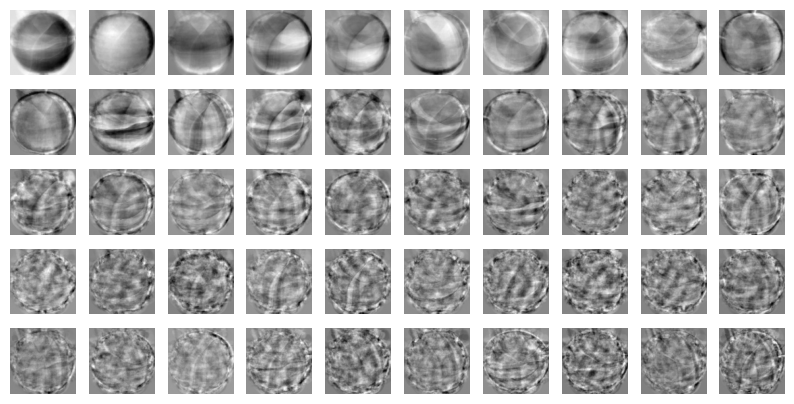

In [70]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [71]:
fruits_pca = pca.transform(fruits_2d) # pca.transform() : 원본 데이터의 차원을 50으로 줄여줌
fruits_pca.shape

(300, 50)

### 원본 데이터 재구성(복원)

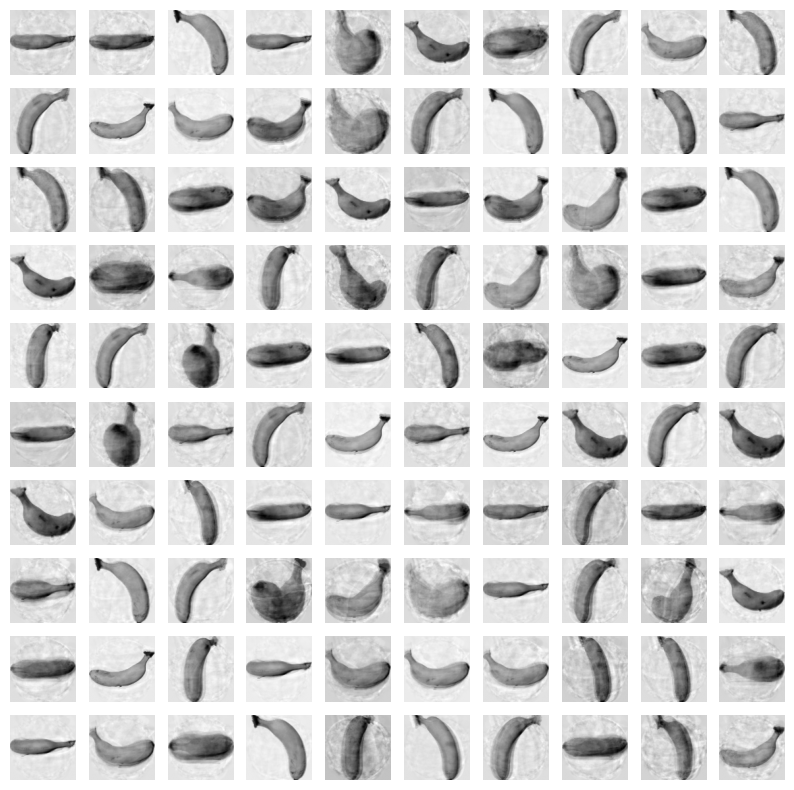

In [72]:
fruits_inverse = pca.inverse_transform(fruits_pca) # pca.inverse_transform() : 원본 데이터 복원
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[200:300])

### 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [52]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578895, 0.00511201, 0.00486383, 0.00480347,
       0.00447834, 0.00437316, 0.0040804 , 0.00389474, 0.00372439,
       0.00359291, 0.00331367, 0.00317848, 0.00304274, 0.00303595,
       0.00288878, 0.00275799, 0.00264929, 0.00255808, 0.0025205 ,
       0.0024726 , 0.00239576, 0.00230835, 0.00221959, 0.00216645,
       0.00213643, 0.00196611, 0.00192705, 0.00190952, 0.00184653,
       0.00182226, 0.00173961, 0.00169264, 0.00163879, 0.00162443])

In [73]:
np.sum(pca.explained_variance_ratio_) # pca.explained_variance_ratio_ : 각 주성분의 설명된 분산 비율이 기록되어 있음

np.float64(0.9215772679417897)

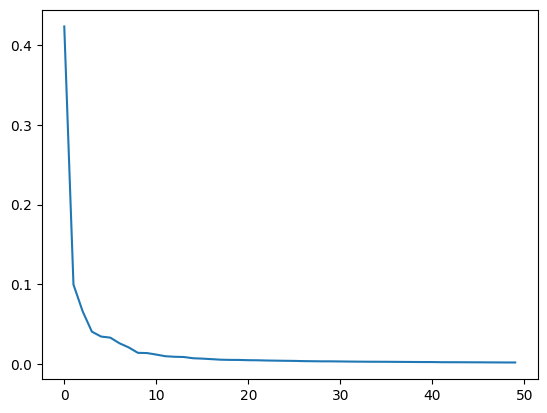

In [75]:
# plt.plot(pca.explained_variance_ratio_)
# plt.show()

### 다른 알고리즘과 함께 사용하기

In [76]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [77]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.16844153, 0.15813804, 0.16604781, 0.16087055, 0.16510701]), 'score_time': array([0.00218964, 0.00214458, 0.00239658, 0.00229144, 0.00227785]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [78]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00693536, 0.01071   , 0.00777984, 0.00854039, 0.01149869]), 'score_time': array([0.0011487 , 0.00080895, 0.00053835, 0.00060964, 0.00049472]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [79]:
pca = PCA(n_components=0.5) # 설명된 분산의 50%에 달하는 주성분 찾기
pca.fit(fruits_2d)
pca.n_components_ # 2개의 특성만으로 원본데이터에 있는 분산의 50%를 설명할 수 있음

np.int64(2)

In [80]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [81]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.03370452, 0.0190165 , 0.01726961, 0.01047897, 0.01989698]),
 'score_time': array([0.0009234 , 0.00049925, 0.00050426, 0.00045705, 0.00047421]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [82]:
# K-평균
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [83]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [88]:
# # 레이블을 사용해 과일 이미지 출력
# for label in range(3):
#     draw_fruits(fruits[km.labels_ == label], ratio)
#     print('\n')

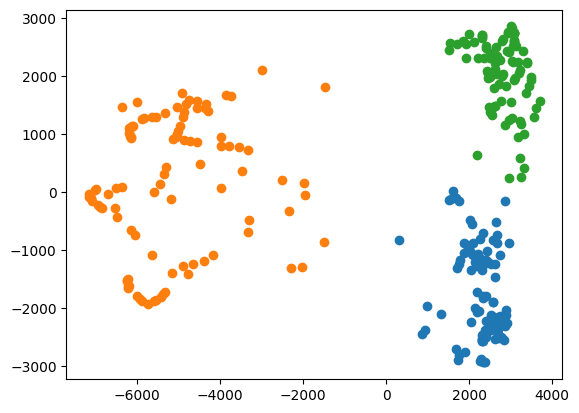

In [84]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])